In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
zip_path = "/content/drive/MyDrive/covid_radiography.zip"



In [ ]:
import os

print(os.listdir('/content/drive/MyDrive'))



['Colab Notebooks', 'Ingeniería de software II', 'DesarrolloSoftwareI', 'NAC', 'Base Datos II', 'Diagrama sin título (1).drawio', 'Proyecto_PISIP.rar', 'Diagrama sin título.drawio', 'PISIB GRUPO 2', 'BASEDATOSIIDE', 'BASEDATOSIIDE.rar', 'INFORME PISIP GRUPO 2.pdf', 'Pruebas Desarrollo', 'Mineria datos', 'Ayudas', 'Desarrollo Software II', 'Documento sin título (15).gdoc', 'Documento sin título (14).gdoc', 'Documento sin título (13).gdoc', 'Proyecto Desarrollo Software II', 'Documento sin título (12).gdoc', 'Documento sin título (11).gdoc', 'Documento sin título (10).gdoc', 'Documento sin título (9).gdoc', 'Documento sin título (8).gdoc', 'Documento sin título (7).gdoc', 'Documento sin título (6).gdoc', 'Documento sin título (5).gdoc', 'image.png', 'Informe Final.gdoc', 'Documento sin título (4).gdoc', 'Avance Semana 3.docx', 'Informe Final Proyecto.docx', 'Video.mp4', 'U1S2_BCP.pdf', 'Octavo Semestre', 'Ingles', 'Test de autoevaluación en blanco.gform', 'Formulario de I

In [ ]:
import zipfile

zip_path = '/content/drive/MyDrive/Dataset_COVID.zip'

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall('Dataset_COVID')  # Se extrae dentro de la carpeta Dataset_COVID en Colab



In [ ]:
import zipfile

zip_path = '/content/drive/MyDrive/Dataset_COVID.zip'  # Ajusta si cambia la ruta
target_folders = ['COVID/', 'Normal/', 'ViralPneumonia/']

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    for file in zip_ref.namelist():
        # Extrae solo si el archivo pertenece a las carpetas necesarias
        if any(file.startswith(folder) for folder in target_folders):
            zip_ref.extract(file, path='/content/Dataset_COVID_partial')

print("Extracción parcial completada.")



Extracción parcial completada.


In [ ]:
input_path = '/content/Dataset_COVID/COVID-19_Radiography_Dataset'
import os

input_path = '/content/Dataset_COVID/COVID-19_Radiography_Dataset'

# Listar solo carpetas (clases)
classes = [d for d in os.listdir(input_path) if os.path.isdir(os.path.join(input_path, d))]
print(classes)


['Normal', 'Viral Pneumonia', 'COVID', 'Lung_Opacity']


In [ ]:
import os
import cv2
from tqdm import tqdm

input_path = '/content/Dataset_COVID/COVID-19_Radiography_Dataset'
output_path = '/content/Dataset_COVID_resized'

def resize_images(target_size=(224, 224)):
    # Obtener solo carpetas (clases)
    classes = [d for d in os.listdir(input_path) if os.path.isdir(os.path.join(input_path, d))]

    for cls in classes:
        input_dir = os.path.join(input_path, cls)
        output_dir = os.path.join(output_path, cls)

        # Crear carpeta destino si no existe
        if not os.path.exists(output_dir):
            os.makedirs(output_dir)

        # Procesar cada imagen en la carpeta
        for img_name in tqdm(os.listdir(input_dir), desc=f'Resizing {cls}'):
            img_path = os.path.join(input_dir, img_name)
            img = cv2.imread(img_path)
            if img is not None:
                resized_img = cv2.resize(img, target_size)
                cv2.imwrite(os.path.join(output_dir, img_name), resized_img)
            else:
                print(f"Warning: no se pudo leer imagen {img_path}")

resize_images()
print("Redimensionamiento completo.")



Resizing Normal: 100%|██████████| 2/2 [00:00<00:00, 155.40it/s]


Resizing Viral Pneumonia: 100%|██████████| 2/2 [00:00<00:00, 2314.10it/s]


Resizing COVID: 100%|██████████| 2/2 [00:00<00:00, 3463.50it/s]


Resizing Lung_Opacity: 100%|██████████| 2/2 [00:00<00:00, 8867.45it/s]

Redimensionamiento completo.


In [ ]:
import torch
import torchvision
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
import os


In [ ]:
transform = transforms.Compose([
    transforms.Resize((224, 224)),  # redimensionar
    transforms.ToTensor(),           # convertir a tensor
    transforms.Normalize([0.485, 0.456, 0.406],  # normalización estándar imagen RGB
                         [0.229, 0.224, 0.225])
])


In [ ]:
import os
import shutil

# Ruta de origen
src_base = '/content/Dataset_COVID/COVID-19_Radiography_Dataset'
# Ruta destino limpia
dst_base = '/content/Dataset_COVID_clean'

# Nombres de las clases
clases = ['COVID', 'Normal', 'Viral Pneumonia', 'Lung_Opacity']

# Creamos la nueva estructura
for cls in clases:
    src_imgs = os.path.join(src_base, cls, 'images')
    dst_imgs = os.path.join(dst_base, cls)
    os.makedirs(dst_imgs, exist_ok=True)

    # Copiar solo imágenes (.png, .jpg, .jpeg)
    for fname in os.listdir(src_imgs):
        if fname.lower().endswith(('.png', '.jpg', '.jpeg')):
            shutil.copy(os.path.join(src_imgs, fname), os.path.join(dst_imgs, fname))

print("✅ Reorganización completada.")



✅ Reorganización completada.


In [ ]:
from torchvision import transforms
from torchvision.datasets import ImageFolder
from torch.utils.data import DataLoader, random_split

# Ruta a la carpeta limpia
data_dir = '/content/Dataset_COVID_clean'

# Transformaciones (redimensionar, convertir a tensor y normalizar)
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize([0.5], [0.5])  # Normalización simple, puedes ajustarla
])

# Cargar dataset
dataset = ImageFolder(root=data_dir, transform=transform)

# Dividir en entrenamiento y validación (80%-20%)
train_size = int(0.8 * len(dataset))
val_size = len(dataset) - train_size
train_dataset, val_dataset = random_split(dataset, [train_size, val_size])

# DataLoaders
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=32)

print("✅ Dataset cargado y dividido en entrenamiento y validación.")
print("Clases:", dataset.classes)


✅ Dataset cargado y dividido en entrenamiento y validación.
Clases: ['COVID', 'Lung_Opacity', 'Normal', 'Viral Pneumonia']


In [ ]:
import torch
import torch.nn as nn
import torchvision.models as models

# Cargar modelo ResNet18 preentrenado
model = models.resnet18(pretrained=True)

# Congelar las capas convolucionales (opcional: para transfer learning)
for param in model.parameters():
    param.requires_grad = False

# Reemplazar la capa final para 4 clases
num_ftrs = model.fc.in_features
model.fc = nn.Linear(num_ftrs, 4)  # 4 clases: COVID, Lung_Opacity, Normal, Viral Pneumonia

# Enviar el modelo a la GPU si está disponible
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = model.to(device)

print("✅ Modelo ResNet18 adaptado para clasificación en 4 clases.")


/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth
100%|██████████| 44.7M/44.7M [00:00<00:00, 95.0MB/s]


✅ Modelo ResNet18 adaptado para clasificación en 4 clases.


In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from tqdm import tqdm

# Parámetros
num_epochs = 5           # Puedes ajustar (idealmente 10–15 si el tiempo y RAM lo permiten)
learning_rate = 1e-3

# Definimos la función de pérdida y el optimizador (solo para la capa fc, ya que congelamos el resto)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.fc.parameters(), lr=learning_rate)

# Función para entrenar durante una época
def train_one_epoch(model, loader, criterion, optimizer, device):
    model.train()
    running_loss = 0.0
    running_corrects = 0
    total_samples = 0

    for inputs, labels in tqdm(loader, desc="Entrenando"):
        inputs = inputs.to(device)
        labels = labels.to(device)

        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # Métricas
        _, preds = torch.max(outputs, 1)
        running_loss += loss.item() * inputs.size(0)
        running_corrects += (preds == labels).sum().item()
        total_samples += inputs.size(0)

    epoch_loss = running_loss / total_samples
    epoch_acc = running_corrects / total_samples
    return epoch_loss, epoch_acc

# Función para validar durante una época
def validate_one_epoch(model, loader, criterion, device):
    model.eval()
    val_loss = 0.0
    val_corrects = 0
    total_samples = 0

    with torch.no_grad():
        for inputs, labels in tqdm(loader, desc="Validando"):
            inputs = inputs.to(device)
            labels = labels.to(device)

            outputs = model(inputs)
            loss = criterion(outputs, labels)

            _, preds = torch.max(outputs, 1)
            val_loss += loss.item() * inputs.size(0)
            val_corrects += (preds == labels).sum().item()
            total_samples += inputs.size(0)

    epoch_loss = val_loss / total_samples
    epoch_acc = val_corrects / total_samples
    return epoch_loss, epoch_acc

# Bucle principal de entrenamiento
best_val_acc = 0.0

for epoch in range(num_epochs):
    train_loss, train_acc = train_one_epoch(model, train_loader, criterion, optimizer, device)
    val_loss, val_acc = validate_one_epoch(model, val_loader, criterion, device)

    print(f"\nÉpoca {epoch+1}/{num_epochs}")
    print(f"  → Train Loss: {train_loss:.4f}   Train Acc: {train_acc:.4f}")
    print(f"  → Val   Loss: {val_loss:.4f}   Val   Acc: {val_acc:.4f}")

    # Guardar el mejor modelo
    if val_acc > best_val_acc:
        best_val_acc = val_acc
        torch.save(model.state_dict(), "/content/best_resnet18.pth")
        print("  ⏺ Guardado modelo con mejor validación.")

print(f"\n✅ Entrenamiento completado. Mejor Val Acc: {best_val_acc:.4f}")


Validando: 100%|██████████| 133/133 [07:30<00:00,  3.39s/it]



Época 1/5
  → Train Loss: 0.6324   Train Acc: 0.7612
  → Val   Loss: 0.4922   Val   Acc: 0.8131
  ⏺ Guardado modelo con mejor validación.


Validando: 100%|██████████| 133/133 [07:07<00:00,  3.22s/it]



Época 2/5
  → Train Loss: 0.4827   Train Acc: 0.8213
  → Val   Loss: 0.4452   Val   Acc: 0.8394
  ⏺ Guardado modelo con mejor validación.


Validando: 100%|██████████| 133/133 [07:08<00:00,  3.23s/it]



Época 3/5
  → Train Loss: 0.4510   Train Acc: 0.8288
  → Val   Loss: 0.4397   Val   Acc: 0.8301


Validando: 100%|██████████| 133/133 [07:07<00:00,  3.21s/it]



Época 4/5
  → Train Loss: 0.4313   Train Acc: 0.8424
  → Val   Loss: 0.4302   Val   Acc: 0.8424
  ⏺ Guardado modelo con mejor validación.


Validando: 100%|██████████| 133/133 [07:08<00:00,  3.22s/it]


Época 5/5
  → Train Loss: 0.4204   Train Acc: 0.8438
  → Val   Loss: 0.4191   Val   Acc: 0.8431
  ⏺ Guardado modelo con mejor validación.

✅ Entrenamiento completado. Mejor Val Acc: 0.8431


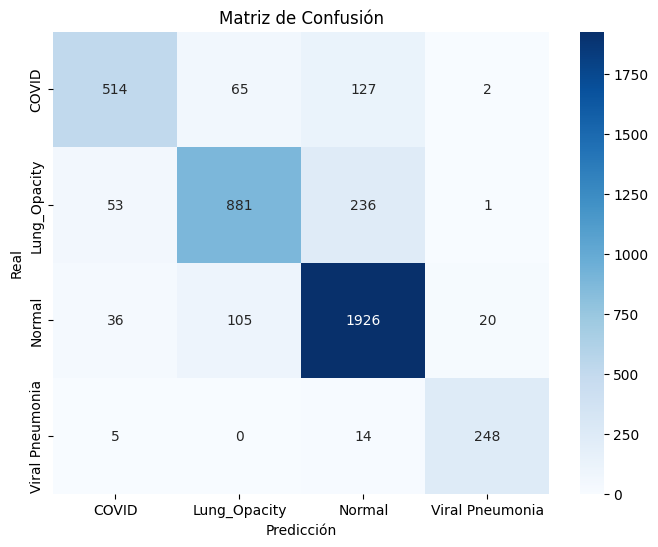


Reporte de Clasificación:

                 precision    recall  f1-score   support

          COVID       0.85      0.73      0.78       708
   Lung_Opacity       0.84      0.75      0.79      1171
         Normal       0.84      0.92      0.88      2087
Viral Pneumonia       0.92      0.93      0.92       267

       accuracy                           0.84      4233
      macro avg       0.86      0.83      0.84      4233
   weighted avg       0.84      0.84      0.84      4233



In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Cargar mejor modelo
model.load_state_dict(torch.load("/content/best_resnet18.pth"))
model.eval()

# Obtener predicciones verdaderas y del modelo
all_preds = []
all_labels = []

with torch.no_grad():
    for inputs, labels in val_loader:
        inputs = inputs.to(device)
        outputs = model(inputs)
        _, preds = torch.max(outputs, 1)

        all_preds.extend(preds.cpu().numpy())
        all_labels.extend(labels.cpu().numpy())
# Mostrar matriz de confusión
cm = confusion_matrix(all_labels, all_preds)
class_names = dataset.classes

plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicción')
plt.ylabel('Real')
plt.title('Matriz de Confusión')
plt.show()

# Reporte detallado
print("\nReporte de Clasificación:\n")
print(classification_report(all_labels, all_preds, target_names=class_names))



In [ ]:
import torch

# Guardar el modelo entrenado
model_path = "/content/covid_model.pth"
torch.save(model.state_dict(), model_path)

print(f"Modelo guardado en: {model_path}")


Modelo guardado en: /content/covid_model.pth


In [ ]:
!pip install onnx



   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.6/17.6 MB 41.2 MB/s eta 0:00:00


In [ ]:
!pip install onnx

import torch

onnx_path = "/content/covid_model.onnx"
example_input = torch.randn(1, 3, 224, 224)

torch.onnx.export(
    model,
    example_input,
    onnx_path,
    export_params=True,
    opset_version=11,
    do_constant_folding=True,
    input_names=['input'],
    output_names=['output'],
    dynamic_axes={'input': {0: 'batch_size'}, 'output': {0: 'batch_size'}}
)

print(f"Modelo ONNX guardado en: {onnx_path}")


Modelo ONNX guardado en: /content/covid_model.onnx


In [ ]:
!pip install onnxruntime
import onnxruntime as ort
import numpy as np
import torch

# Ruta del modelo ONNX guardado
onnx_path = "/content/covid_model.onnx"

# Crear sesión ONNX Runtime
ort_session = ort.InferenceSession(onnx_path)

# Preparar un ejemplo de entrada,
example_input = torch.randn(1, 3, 224, 224)

# Convertir tensor de PyTorch a numpy
ort_inputs = {ort_session.get_inputs()[0].name: example_input.numpy()}

# Ejecutar inferencia
ort_outs = ort_session.run(None, ort_inputs)

print("Salida del modelo ONNX:", ort_outs)


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.4/16.4 MB 51.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.0/46.0 kB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.8/86.8 kB 5.6 MB/s eta 0:00:00
Salida del modelo ONNX: [array([[13.547906 ,  1.61348  , -6.5856113, -9.062792 ]], dtype=float32)]


In [ ]:
!pip install psutil

In [ ]:
import psutil
import time
import torch
from torch.utils.data import DataLoader

def monitor_inference_with_dataloader(model, device, dataset, batch_size=16, duration=None):

    model.eval()
    dataloader = DataLoader(dataset, batch_size=batch_size, shuffle=True)
    process = psutil.Process()

    start_time = time.time()
    print("Iniciando monitoreo de CPU y RAM durante inferencia con DataLoader...")

    for batch_idx, (images, labels) in enumerate(dataloader):
        if duration and (time.time() - start_time) > duration:
            break

        images = images.to(device)
        with torch.no_grad():
            outputs = model(images)

        # Lectura uso CPU y RAM
        cpu_percent = psutil.cpu_percent(interval=None)
        mem_info = process.memory_info()
        ram_mb = mem_info.rss / (1024 ** 2)

        print(f"Batch {batch_idx+1}: CPU Usage: {cpu_percent:.1f}% | RAM Usage: {ram_mb:.2f} MB")

    print("Monitoreo finalizado.")

monitor_inference_with_dataloader(model, device, val_dataset, batch_size=16, duration=30)


Iniciando monitoreo de CPU y RAM durante inferencia con DataLoader...
Batch 1: CPU Usage: 57.2% | RAM Usage: 936.49 MB
Batch 2: CPU Usage: 54.9% | RAM Usage: 936.67 MB
Batch 3: CPU Usage: 53.2% | RAM Usage: 939.50 MB
Batch 4: CPU Usage: 80.9% | RAM Usage: 939.73 MB
Batch 5: CPU Usage: 99.5% | RAM Usage: 939.73 MB
Batch 6: CPU Usage: 83.1% | RAM Usage: 939.73 MB
Batch 7: CPU Usage: 54.6% | RAM Usage: 939.73 MB
Batch 8: CPU Usage: 53.7% | RAM Usage: 939.73 MB
Batch 9: CPU Usage: 53.2% | RAM Usage: 939.73 MB
Batch 10: CPU Usage: 57.8% | RAM Usage: 939.73 MB
Batch 11: CPU Usage: 53.7% | RAM Usage: 939.73 MB
Batch 12: CPU Usage: 53.2% | RAM Usage: 939.73 MB
Batch 13: CPU Usage: 67.8% | RAM Usage: 939.73 MB
Batch 14: CPU Usage: 99.8% | RAM Usage: 939.73 MB
Batch 15: CPU Usage: 94.9% | RAM Usage: 939.73 MB
Batch 16: CPU Usage: 53.9% | RAM Usage: 939.73 MB
Batch 17: CPU Usage: 53.5% | RAM Usage: 939.73 MB
Batch 18: CPU Usage: 54.6% | RAM Usage: 939.73 MB
Batch 19: CPU Usage: 53.0% | RAM Usage:

In [64]:
import onnxruntime as ort

# Ruta al modelo ONNX en tu Google Drive
modelo_path = '/content/drive/MyDrive/covid_classifier/covid_model.onnx'

# Cargar el modelo
session = ort.InferenceSession(modelo_path)

print("✅ Modelo cargado correctamente.")



✅ Modelo cargado correctamente.


2025-06-01 04:41:45.272 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-01 04:41:45.655 
  command:

    streamlit run /usr/local/lib/python3.11/dist-packages/colab_kernel_launcher.py [ARGUMENTS]
2025-06-01 04:41:45.662 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-01 04:41:45.748 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-01 04:41:46.119 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-01 04:41:46.120 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-01 04:41:46.122 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-01 04:41:46.124 Thread 'MainThread': mi

DeltaGenerator()

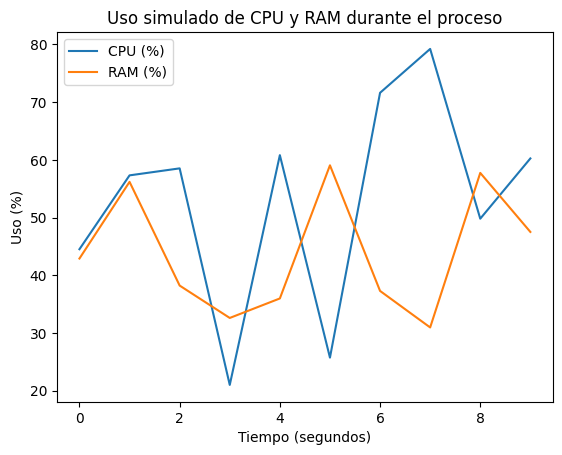

In [67]:
import streamlit as st
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

st.title("Dashboard de Visualización - Proyecto COVID")

tiempo = np.arange(0, 10, 1)
uso_cpu = np.random.uniform(20, 80, size=10)
uso_ram = np.random.uniform(30, 70, size=10)

# Mostrar gráfico de uso de CPU y RAM
fig, ax = plt.subplots()
ax.plot(tiempo, uso_cpu, label="CPU (%)")
ax.plot(tiempo, uso_ram, label="RAM (%)")
ax.set_xlabel("Tiempo (segundos)")
ax.set_ylabel("Uso (%)")
ax.set_title("Uso simulado de CPU y RAM durante el proceso")
ax.legend()

st.pyplot(fig)

# Métricas del modelo (ejemplo)
metrics = {
    "Precisión": 0.92,
    "Recall": 0.89,
    "F1-Score": 0.90,
    "Exactitud": 0.91
}

st.subheader("Métricas del Modelo")
metrics_df = pd.DataFrame.from_dict(metrics, orient='index', columns=["Valor"])
st.table(metrics_df)


st.bar_chart(metrics_df)


